In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [184]:
data = pd.read_csv('./sarah_cleaned_output.csv')
columns_to_include = ['sugar','protein', 'calories']
data = data[columns_to_include]

# filter data
data = data.dropna()
# have to reset the index after dropping the null rows or else next cell will error
data = data.reset_index(drop=True)

In [185]:
def clean_monetary_value(data):
    if isinstance(data, str):
        if '-' in data:
            range_values = data.split('-')
            cleaned_data = (float(range_values[0]) + float(range_values[1])) / 2
        else:
            cleaned_data = ''.join(i for i in data if i.isdigit() or i == '.' )
            cleaned_data = float(cleaned_data) if cleaned_data != '' else 0
        return cleaned_data
    return data

def clean_string_with_comma(data):
    if isinstance(data, str):
        cleaned_data = data.replace(',', '')
        return float(cleaned_data)
    return data

def clean_percentage(data):
    if isinstance(data, str):
        return float(data.strip('%'))
    return data

# data['calories'] = data['calories'].apply(clean_monetary_value)
# data['total_fat'] = data['total_fat'].apply(clean_monetary_value)
# data['cholesterol'] = data['cholesterol'].apply(clean_monetary_value)

# data['sodium'] = data['sodium'].apply(clean_monetary_value)
# data['carbohydrates'] = data['carbohydrates'].apply(clean_monetary_value)
# data['dietary_fiber'] = data['dietary_fiber'].apply(clean_monetary_value)

data['sugar'] = data['sugar'].apply(clean_monetary_value)
data['protein'] = data['protein'].apply(clean_monetary_value)
data['calories'] = data['calories'].apply(clean_monetary_value)

# put variables together
x = [] 
for i in range(len(data)):
    x.append([data[columns_to_include[0]][i], data[columns_to_include[1]][i], data[columns_to_include[2]][i]])

print(data)

       sugar  protein  calories
0        9.0     16.0     370.0
1        9.0      5.0     220.0
2        3.0     11.0     280.0
3        4.0      6.0     130.0
4       44.0     40.0    1560.0
...      ...      ...       ...
23704    1.0     77.0     890.0
23705    3.0    100.0    1150.0
23706    3.0     47.0     680.0
23707    3.0     47.0     780.0
23708   39.0      0.0     160.0

[23709 rows x 3 columns]


## Finding the Optimal K-Value

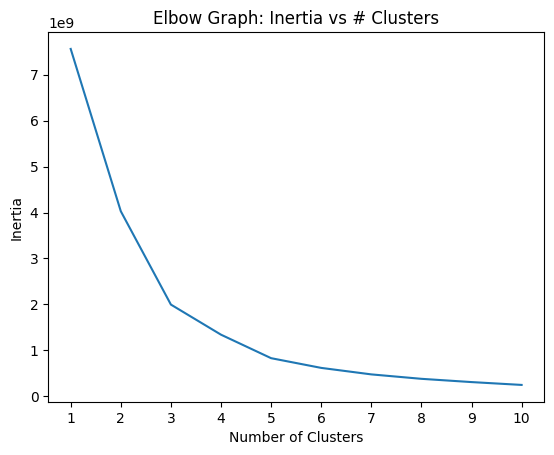

In [186]:
sse = []
num_iterations = 10 # iterations
num_max_iter = 300 # max iterations

for i in range(1,11):
    num_c = i # clusters

    # initialize k-means
    km = KMeans(n_clusters=num_c, n_init=num_iterations, max_iter=num_max_iter)

    # fit and predict
    y_km = km.fit_predict(x)

    sse.append(km.inertia_)

# plot elbow graph
plt.plot(sse)
# reset x ticks to match num_clusters
plt.xticks(range(0,10), range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph: Inertia vs # Clusters')
plt.show()

## Visualization

In [187]:
def visualize_clusters(clusters):
    # plot clusters
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    # add each cluster to graph and legend

    for i, cluster in enumerate(clusters):    
        # cluster = cluster.loc[cluster['calories'] < 2000]
        # cluster = cluster.loc[cluster['carbohydrates'] < 200]
        # cluster = cluster.loc[cluster['sodium'] < 1250]
        ax.scatter(cluster[columns_to_include[0]], cluster[columns_to_include[1]], cluster[columns_to_include[2]], label=f'Cluster {i+1}')
    ax.set_xlabel(columns_to_include[0])
    ax.set_ylabel(columns_to_include[1])
    ax.set_zlabel(columns_to_include[2])
    plt.title(f'Relationship between {columns_to_include[0]}, {columns_to_include[1]}, and {columns_to_include[2]} with K Means Visualization (K = {len(clusters)})')
    # add legend
    ax.legend()  
    plt.show()


# the optimal k value
num_clusters =  3

num_iterations = 10 # iterations
num_max_iter = 300 # max iterations

# initialize k-means
km = KMeans(n_clusters=num_clusters, n_init=num_iterations, max_iter=num_max_iter)

# fit and predict
y_km = km.fit_predict(x)

# get centroid locations
c_centers = km.cluster_centers_
print('Centroids locations:\n', c_centers)

# add assigned cluster to dataframe
clustered_data = data.copy()
clustered_data['cluster'] = y_km

clusters = []

# separate clustered_data into its respective clusters. You should have k clusters (likely k dataframes with the relevant). Add each cluster/dataframe to the clusters list
# add each cluster to clusters list

for i in range(num_clusters):
    cluster = clustered_data[clustered_data['cluster'] == i][data.columns]
    clusters.append(cluster)


Centroids locations:
 [[  18.05672332    6.63011881  220.94307263]
 [ 114.10734463  210.39548023 4640.36158192]
 [  34.32304504   42.96209631 1047.25613321]]


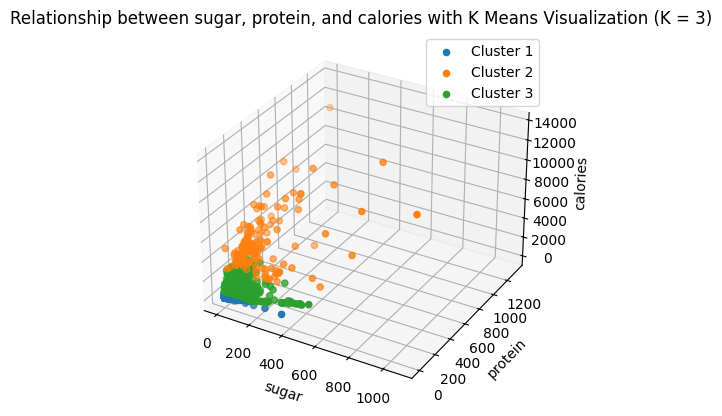

In [188]:
# visualize
visualize_clusters(clusters)